In [1]:
import os, sys
currentdir = os.path.dirname(os.path.realpath(os.path.abspath("")))
scriptsdir = os.path.dirname(currentdir)
if scriptsdir not in sys.path:
    sys.path.append(scriptsdir)

from customscripts import configuration
from customscripts import utils

# Common imports

import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = utils.get_race_dataset_df()

data = data.loc["2010-04-01":"2019-12-01"]
data

,Trade Flow,Reporter,Commodity Code,Commodity,Trade Value (US$)
Period,,,,,
2010-04-01,Imports,Brazil,2,Meat and edible meat offal,14652018
2010-04-01,Imports,Brazil,15,Animal or vegetable fats and oils and their cl...,48292263
2010-04-01,Imports,Brazil,22,"Beverages, spirits and vinegar",36944440
2010-04-01,Exports,Brazil,4,Dairy produce; birds' eggs; natural honey; edi...,25516147
2010-04-01,Exports,Brazil,18,Cocoa and cocoa preparations,36348417
...,...,...,...,...,...
2019-11-01,Re-imports,France,2,Meat and edible meat offal,2439277
2019-11-01,Re-imports,France,3,"Fish and crustaceans, molluscs and other aquat...",1954955
2019-11-01,Re-imports,France,4,Dairy produce; birds' eggs; natural honey; edi...,5777243


In [8]:
data_2010123 = utils.get_race_dataset_2010123_df();
data_2010123 = data_2010123.drop(columns=["Unnamed: 0", "Classification", "Year", "Period Desc.", "Aggregate Level", "Is Leaf Code", "Trade Flow Code", "Reporter Code", "Qty", "Alt Qty Unit", "Alt Qty", "Netweight (kg)", "Gross weight (kg)", "CIF Trade Value (US$)", "FOB Trade Value (US$)", "Flag", "Partner Code", "Partner ISO", "2nd Partner Code", "2nd Partner", "2nd Partner ISO", "Customs Proc. Code", "Mode of Transport Code", "Mode of Transport", "Customs", "Reporter ISO", "Alt Qty Unit Code", "Qty Unit Code", "Qty Unit", "Partner"]);
data_2010123["Period"] = pd.to_datetime(data_2010123["Period"], format="%Y%m");
data_2010123 = data_2010123.set_index("Period");
data_merged = pd.concat([data_2010123, data]).sort_index() \
    [(data_merged["Trade Flow"] != "Re-imports") & (data_merged["Trade Flow"] != "Re-exports")]

In [11]:
data_codes = data_merged.copy()
data_codes["Commodity"] = data_merged["Commodity"].str.slice(0, 30)
data_codes["Commodity"] = data_codes["Commodity"] + " - " + data_codes["Commodity Code"].astype(str)

data_imports = data_codes[data_codes["Trade Flow"] != "Exports"] \
    .drop(columns=["Trade Flow", "Reporter"]) \
    .pivot_table(index="Period", columns="Commodity", values="Trade Value (US$)")
data_exports = data_codes[data_codes["Trade Flow"] != "Imports"] \
    .drop(columns=["Trade Flow", "Reporter"]) \
    .pivot_table(index="Period", columns="Commodity", values="Trade Value (US$)")


Commodity,Animal or vegetable fats and o - 15,Animal originated products; no - 5,"Beverages, spirits and vinegar - 22",Cereals - 10,Cocoa and cocoa preparations - 18,"Coffee, tea, mate and spices - 9",Dairy produce; birds' eggs; na - 4,"Fish and crustaceans, molluscs - 3","Fruit and nuts, edible; peel o - 8",Meat and edible meat offal - 2,Miscellaneous edible preparati - 21,Oil seeds and oleaginous fruit - 12,"Preparations of cereals, flour - 19","Preparations of vegetables, fr - 20",Products of the milling indust - 11,Sugars and sugar confectionery - 17,Vegetables and certain roots a - 7
Period,,,,,,,,,,,,,,,,,
2010-01-01,7.269298e+07,1.665677e+07,6.892727e+07,6.904969e+07,5.656620e+07,2.352549e+08,6.244563e+07,6.154636e+07,2.861099e+08,7.941707e+07,4.006151e+07,1.043060e+08,4.056163e+07,3.781114e+07,2.207573e+07,3.014136e+07,5.083869e+07
2010-02-01,7.994646e+07,1.761597e+07,8.040813e+07,6.420714e+07,4.721750e+07,2.517561e+08,5.945848e+07,5.998344e+07,1.557911e+08,8.154688e+07,4.619463e+07,8.550198e+07,4.265162e+07,3.707348e+07,2.571359e+07,3.340496e+07,5.642668e+07
2010-03-01,8.706927e+07,1.612100e+07,9.517600e+07,7.742106e+07,3.435002e+07,1.996538e+08,6.687322e+07,1.276375e+08,1.391077e+08,9.477351e+07,5.294583e+07,7.959659e+07,4.996870e+07,4.479010e+07,4.593133e+07,4.029004e+07,1.188740e+08
2010-04-01,5.575487e+07,8.495575e+06,9.312853e+07,7.522072e+07,3.384991e+07,2.260810e+07,6.507233e+07,5.294171e+07,6.333064e+07,9.595482e+07,5.009944e+07,6.286047e+07,4.667557e+07,4.414208e+07,1.412690e+07,3.561394e+07,5.704460e+07
2010-05-01,5.436547e+07,8.493495e+06,8.757190e+07,6.703442e+07,3.014666e+07,2.153952e+07,6.817036e+07,5.386516e+07,6.316051e+07,9.285355e+07,4.771859e+07,6.400564e+07,4.506242e+07,4.454162e+07,1.281726e+07,3.998941e+07,5.119742e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,7.017587e+07,8.851017e+06,1.315837e+08,1.262700e+08,4.477522e+07,3.288759e+07,7.639850e+07,9.517334e+07,9.153576e+07,1.332710e+08,6.874435e+07,8.382651e+07,7.328092e+07,4.704654e+07,1.850091e+07,3.078561e+07,3.726003e+07
2019-09-01,7.092457e+07,8.672195e+06,1.429515e+08,1.081146e+08,4.860695e+07,3.421408e+07,7.562771e+07,9.619634e+07,8.782244e+07,1.269133e+08,6.624584e+07,7.936192e+07,7.787472e+07,5.264606e+07,1.869802e+07,3.388954e+07,3.867138e+07
2019-10-01,8.047913e+07,1.026589e+07,1.560505e+08,1.149906e+08,5.931820e+07,3.742316e+07,8.674753e+07,1.133708e+08,1.041458e+08,1.510505e+08,7.663822e+07,9.947007e+07,8.672625e+07,5.708673e+07,2.168541e+07,3.693733e+07,4.772048e+07


In [14]:
import bar_chart_race as bcr

def generate_chart_race(df, title, filename):
    bcr.bar_chart_race(
        df=df,
        filename=filename,
        orientation='h',
        sort='desc',
        n_bars=8,
        fixed_order=False,
        fixed_max=True,
        steps_per_period=6,
        label_bars=True,
        bar_size=.95,
        period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
        period_fmt='%B %d, %Y',
        perpendicular_bar_func='median',
        period_length=500,
        figsize=(6, 3),
        dpi=144,
        cmap='dark12',
        title=title,
        bar_label_size=5,
        tick_label_size=7,
        shared_fontdict={'family' : 'Dejavu Sans', 'color' : '.1'},
        scale='linear',
        writer=None,
        fig=None,
        bar_kwargs={'alpha': .7},
        filter_column_colors=False)

In [23]:
generate_chart_race(data_imports, "Imports (US$) by commodity", "imports_2010-2019.mp4")
generate_chart_race(data_exports, "Exports (US$) by commodity", "exports_2010-2019.mp4")

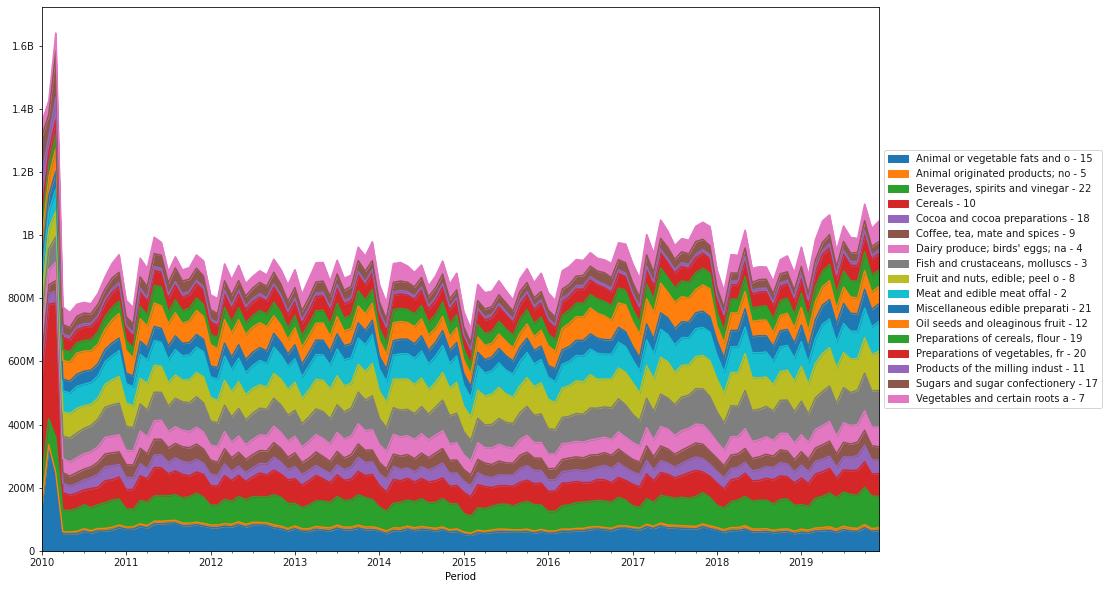

In [22]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots()

formatter = ticker.FuncFormatter(utils.human_format)
ax.yaxis.set_major_formatter(formatter);

data_imports.plot.area(ax=ax, figsize=(15, 10), title="").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

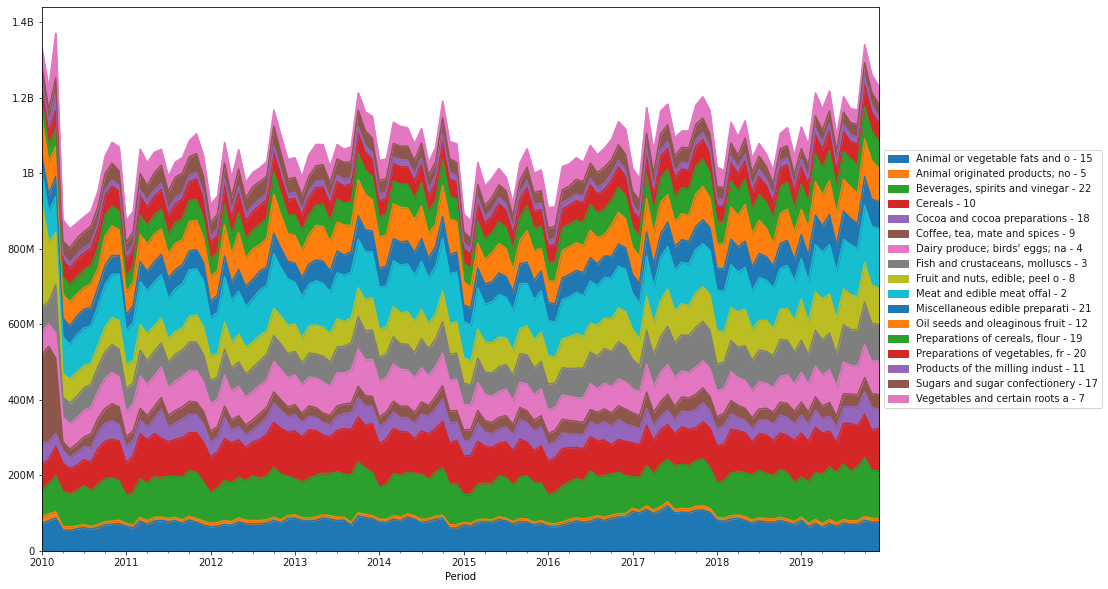

In [21]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots()

formatter = ticker.FuncFormatter(utils.human_format)
ax.yaxis.set_major_formatter(formatter);

data_exports.plot.area(ax=ax, figsize=(15, 10), title="").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

In [7]:
data2010 = data.loc["2010-02-01":"2011-02-01"]

data2010

,Unnamed: 0,Trade Flow,Reporter,Commodity Code,Commodity,Trade Value (US$)
Period,,,,,,
2010-02-01,0,Re-imports,Brazil,18,Cocoa and cocoa preparations,89423
2010-02-01,1,Exports,Croatia,8,"Fruit and nuts, edible; peel of citrus fruit o...",271119
2010-02-01,2,Exports,Croatia,21,Miscellaneous edible preparations,12256583
2010-02-01,3,Exports,Croatia,22,"Beverages, spirits and vinegar",7139763
2010-02-01,4,Imports,Croatia,2,Meat and edible meat offal,14613213
...,...,...,...,...,...,...
2011-01-01,49902,Imports,Greenland,21,Miscellaneous edible preparations,1004022
2011-01-01,49903,Imports,Greenland,22,"Beverages, spirits and vinegar",931309
2011-01-01,49904,Exports,Greenland,22,"Beverages, spirits and vinegar",45


<AxesSubplot:xlabel='Period'>

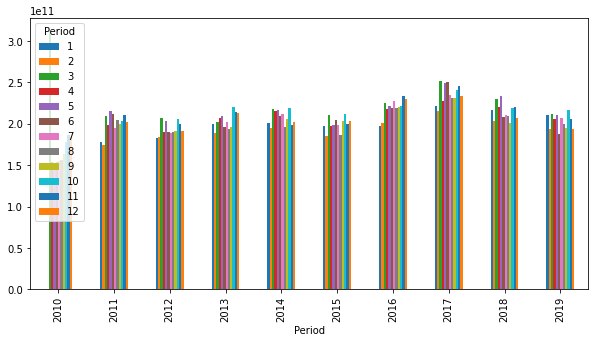

In [34]:
data.groupby([data.index.year, data.index.month])["Trade Value (US$)"].sum().unstack().plot(kind="bar", figsize=(10, 5))


<AxesSubplot:xlabel='Period'>

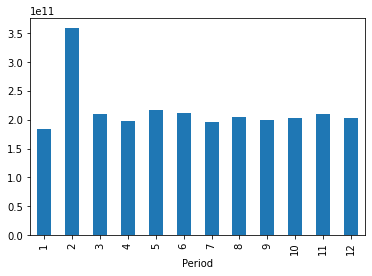

In [24]:
data2011 = data.loc["2011-02-01":"2012-02-01"]
data2011.groupby([data2011.index.month])["Trade Value (US$)"].sum().plot(kind="bar")